In [2]:
import pandas as pd
import matplotlib.pyplot as plt

!pip install openpyxl

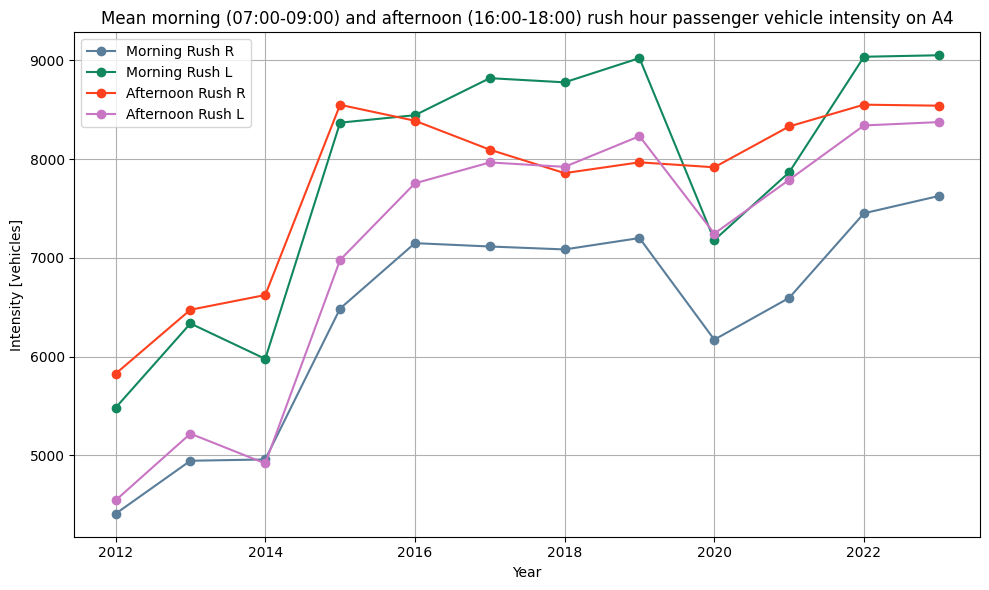

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('PEOPLEmean_scores_road4_HR_R_2012_2019.xlsx')

# Pivot the data for easier plotting
# This will create separate columns for each combination of Rush and Direction
pivot_df = df.pivot_table(index='Year', columns=['Rush', 'Direction'], values='Mean Score')

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the four lines for Morning and Afternoon, L and R directions
plt.plot(pivot_df.index, pivot_df[('Morning', 'R')], color="xkcd:steel blue", label='Morning Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Morning', 'L')], color='xkcd:dark sea green', label='Morning Rush L', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'R')], color='xkcd:orange red', label='Afternoon Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'L')], color='xkcd:orchid', label='Afternoon Rush L', marker='o')

# Add titles and labels
plt.title('Mean morning (07:00-09:00) and afternoon (16:00-18:00) rush hour passenger vehicle intensity on A4')
plt.xlabel('Year')
plt.ylabel('Intensity [vehicles]')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()



In [6]:
data_files = {
    2012: 'datasets_spitsuren_wegvakken/INWEVA_2012_spits.xlsx',
    2013: 'datasets_spitsuren_wegvakken/INWEVA_2013_spits.xlsx',
    2014: 'datasets_spitsuren_wegvakken/INWEVA_2014_spits.xlsx',
    2015: 'datasets_spitsuren_wegvakken/INWEVA_2015_spits.xlsx',
    2016: 'datasets_spitsuren_wegvakken/INWEVA_2016_spits.xlsx',
    2017: 'datasets_spitsuren_wegvakken/INWEVA_2017_spits.xlsx',
    2018: 'datasets_spitsuren_wegvakken/INWEVA_2018_spits.xlsx',
    2019: 'datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx',
    2020: 'datasets_spitsuren_wegvakken/INWEVA_2020_spits.xlsx',
    2021: 'datasets_spitsuren_wegvakken/INWEVA_2021_spits.xlsx',
    2022: 'datasets_spitsuren_wegvakken/INWEVA_2022_spits.xlsx',
    2023: 'datasets_spitsuren_wegvakken/INWEVA_2023_spits.xlsx',
}

# Initialize an empty list to store results
results = []

# Loop through the datasets
for year, file in data_files.items():
    # Load the dataset for the year
    df = pd.read_excel(file)
    
    # Filter the data for road 4 with HR (Hoofdroute)
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    
    # Further filter for Hectometer <= 150,000
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van'] <= 150000) & (df_road_4HR['Hm_naar'] <= 150000)]
    
    # Separate data for 'R' (right) direction
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Calculate the mean score for OS_AL (morning rush) and AS_AL (afternoon rush)
    mean_score_R_OS_R = (df_road_4HR_HM_R['OS_AL']*(df_road_4HR_HM_R['OS_vrachtperc']/100)).mean()
    mean_score_R_AS_R = (df_road_4HR_HM_R['AS_AL']*(df_road_4HR_HM_R['AS_vrachtperc']/100)).mean()

    mean_score_R_OS_L = (df_road_4HR_HM_L['OS_AL']*(df_road_4HR_HM_L['OS_vrachtperc']/100)).mean()
    mean_score_R_AS_L = (df_road_4HR_HM_L['AS_AL']*(df_road_4HR_HM_L['AS_vrachtperc']/100)).mean()
    
     # Store the results for the right side
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'R',   # Right-hand side
        'Mean Score': mean_score_R_OS_R
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'R',      # Right-hand side
        'Mean Score': mean_score_R_AS_R
    })
    
    # Store the results for the left side
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'L',   # Left-hand side
        'Mean Score': mean_score_R_OS_L
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'L',      # Left-hand side
        'Mean Score': mean_score_R_AS_L
    })

# Convert the results into a DataFrame
df_results = pd.DataFrame(results)

# Export the results to an Excel file
df_results.to_excel('FREIGHTmean_scores_road4_HR_R_2012_2019.xlsx', index=False)

display(df_results)


FileNotFoundError: [Errno 2] No such file or directory: 'datasets_spitsuren_wegvakken/INWEVA_2012_spits.xlsx'

In [5]:
extra_table = df_results[df_results['Year'].isin([2018, 2019, 2020])]

display(extra_table)

,Year,Rush,Direction,Mean Score
24,2018,Morning,R,748.407778
25,2018,Afternoon,R,734.871481
26,2018,Morning,L,1021.835600
27,2018,Afternoon,L,848.408000
28,2019,Morning,R,735.934074
29,2019,Afternoon,R,629.888704
30,2019,Morning,L,852.326800
31,2019,Afternoon,L,687.423800
32,2020,Morning,R,847.319783
33,2020,Afternoon,R,735.153043


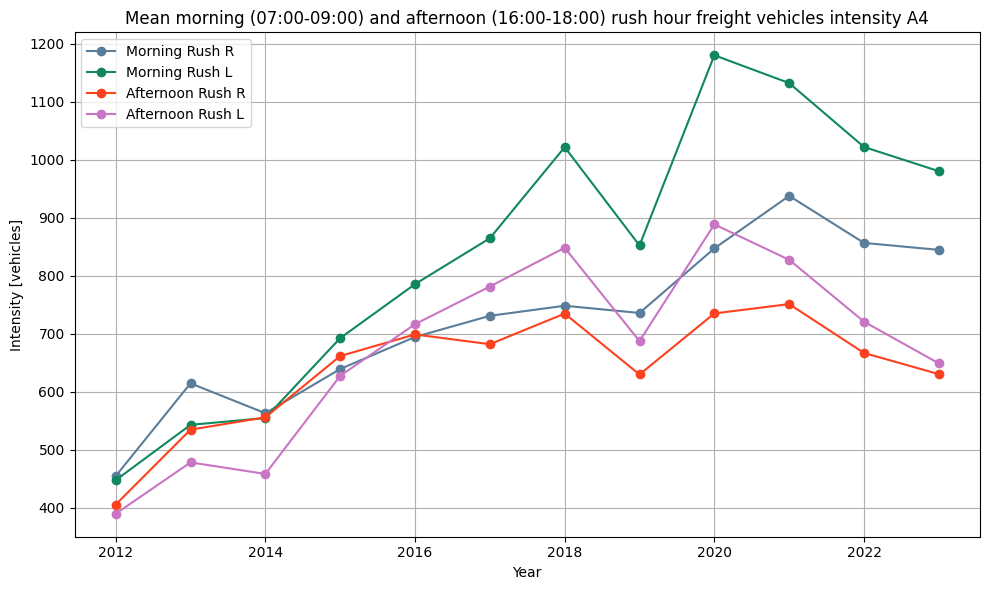

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('FREIGHTmean_scores_road4_HR_R_2012_2019.xlsx')

# Pivot the data for easier plotting
# This will create separate columns for each combination of Rush and Direction
pivot_df = df.pivot_table(index='Year', columns=['Rush', 'Direction'], values='Mean Score')

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the four lines for Morning and Afternoon, L and R directions
plt.plot(pivot_df.index, pivot_df[('Morning', 'R')], color="xkcd:steel blue", label='Morning Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Morning', 'L')], color='xkcd:dark sea green', label='Morning Rush L', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'R')], color='xkcd:orange red', label='Afternoon Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'L')], color='xkcd:orchid', label='Afternoon Rush L', marker='o')


# Add titles and labels
plt.title('Mean morning (07:00-09:00) and afternoon (16:00-18:00) rush hour freight vehicles intensity A4')
plt.xlabel('Year')
plt.ylabel('Intensity [vehicles]')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
# Loop through the datasets
for year, file in data_files.items():
    # Load the dataset for the year
    df = pd.read_excel(file)
    
    # Filter the data for road 4 with HR (Hoofdroute)
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    print(f"Year: {year}, Original Rows: {len(df)}, Filtered Rows: {len(df_road_4HR)}")
    
    # Further filter for Hectometer <= 150,000
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van'] <= 150000) & (df_road_4HR['Hm_naar'] <= 150000)]
    print(f"Year: {year}, Final Rows (HM): {len(df_road_4HR_HM)}")
    
    # Separate data for 'R' (right) direction
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Calculate the mean score for OS_AL (morning rush) and AS_AL (afternoon rush)
    mean_score_R_OS_R = (df_road_4HR_HM_R['OS_AL'] * (df_road_4HR_HM_R['OS_vrachtperc'] / 100)).mean()
    mean_score_R_AS_R = (df_road_4HR_HM_R['AS_AL'] * (df_road_4HR_HM_R['AS_vrachtperc'] / 100)).mean()
    mean_score_R_OS_L = (df_road_4HR_HM_L['OS_AL'] * (df_road_4HR_HM_L['OS_vrachtperc'] / 100)).mean()
    mean_score_R_AS_L = (df_road_4HR_HM_L['AS_AL'] * (df_road_4HR_HM_L['AS_vrachtperc'] / 100)).mean()

    # Log the calculated mean scores
    print(f"Year: {year}, Mean Score R Morning: {mean_score_R_OS_R}, Mean Score R Afternoon: {mean_score_R_AS_R}")

    # Store the results...


Year: 2012, Original Rows: 7572, Filtered Rows: 163
Year: 2012, Final Rows (HM): 140
Year: 2012, Mean Score R Morning: 454.7194444444445, Mean Score R Afternoon: 405.60333333333335


/opt/anaconda3/envs/TIL6022/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Year: 2013, Original Rows: 7567, Filtered Rows: 155
Year: 2013, Final Rows (HM): 124
Year: 2013, Mean Score R Morning: 614.6543076923077, Mean Score R Afternoon: 534.7983076923078
Year: 2014, Original Rows: 7860, Filtered Rows: 163
Year: 2014, Final Rows (HM): 130
Year: 2014, Mean Score R Morning: 563.1496774193549, Mean Score R Afternoon: 556.0338709677419
Year: 2015, Original Rows: 7760, Filtered Rows: 129
Year: 2015, Final Rows (HM): 90
Year: 2015, Mean Score R Morning: 639.3212500000001, Mean Score R Afternoon: 661.7331250000001
Year: 2016, Original Rows: 8659, Filtered Rows: 135
Year: 2016, Final Rows (HM): 96
Year: 2016, Mean Score R Morning: 694.5938000000001, Mean Score R Afternoon: 698.9284
Year: 2017, Original Rows: 8683, Filtered Rows: 145
Year: 2017, Final Rows (HM): 105
Year: 2017, Mean Score R Morning: 731.0389090909092, Mean Score R Afternoon: 682.1149090909091
Year: 2018, Original Rows: 8715, Filtered Rows: 144
Year: 2018, Final Rows (HM): 104
Year: 2018, Mean Score R M

In [67]:
import pandas as pd

# List of file paths for the datasets for each year (2012 to 2019)
data_files = {
    #2012: 'datasets_spitsuren_wegvakken/INWEVA_2012_spits.xlsx',
    #2013: 'datasets_spitsuren_wegvakken/INWEVA_2013_spits.xlsx',
    #2014: 'datasets_spitsuren_wegvakken/INWEVA_2014_spits.xlsx',
    2015: 'datasets_spitsuren_wegvakken/INWEVA_2015_spits.xlsx',
    2016: 'datasets_spitsuren_wegvakken/INWEVA_2016_spits.xlsx',
    2017: 'datasets_spitsuren_wegvakken/INWEVA_2017_spits.xlsx',
    2018: 'datasets_spitsuren_wegvakken/INWEVA_2018_spits.xlsx',
    2019: 'datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx',
    #2020: 'datasets_spitsuren_wegvakken/INWEVA_2020_spits.xlsx',
    #2021: 'datasets_spitsuren_wegvakken/INWEVA_2021_spits.xlsx',
    #2022: 'datasets_spitsuren_wegvakken/INWEVA_2022_spits.xlsx',
    #2023: 'datasets_spitsuren_wegvakken/INWEVA_2023_spits.xlsx',
}

# Initialize an empty list to store results
results = []

# Loop through the datasets
for year, file in data_files.items():
    # Load the dataset for the year
    df = pd.read_excel(file)
    
    # Filter the data for road 4 with HR (Hoofdroute)
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    
    # Further filter for Hectometer <= 150,000
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van'] <= 150000) & (df_road_4HR['Hm_naar'] <= 150000)]
    
    # Separate data for 'R' (right) direction
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Calculate the mean score for OS_AL (morning rush) and AS_AL (afternoon rush)
    mean_score_R_OS_R = df_road_4HR_HM_R['OS_AL'].mean()
    mean_score_R_AS_R = df_road_4HR_HM_R['AS_AL'].mean()

    mean_score_R_OS_L = df_road_4HR_HM_L['OS_AL'].mean()
    mean_score_R_AS_L = df_road_4HR_HM_L['AS_AL'].mean()
    
     # Store the results for the right side
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'R',   # Right-hand side
        'Mean Score': mean_score_R_OS_R
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'R',      # Right-hand side
        'Mean Score': mean_score_R_AS_R
    })
    
    # Store the results for the left side
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'L',   # Left-hand side
        'Mean Score': mean_score_R_OS_L
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'L',      # Left-hand side
        'Mean Score': mean_score_R_AS_L
    })

# Convert the results into a DataFrame
df_results = pd.DataFrame(results)

# Export the results to an Excel file
df_results.to_excel('mean_scores_road4_HR_R_2015_2019.xlsx', index=False)

display(df_results)

,Year,Rush,Direction,Mean Score
0,2015,Morning,R,7126.833333
1,2015,Afternoon,R,9209.770833
2,2015,Morning,L,9070.404762
3,2015,Afternoon,L,7610.547619
4,2016,Morning,R,7842.240000
5,2016,Afternoon,R,9079.440000
6,2016,Morning,L,9234.543478
7,2016,Afternoon,L,8471.913043
8,2017,Morning,R,7842.490909
9,2017,Afternoon,R,8778.454545


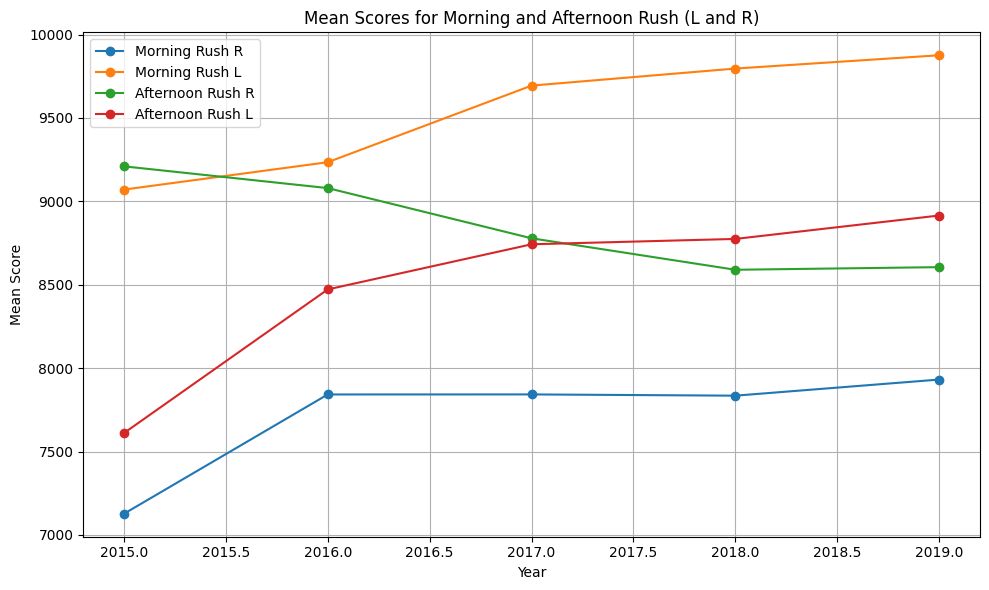

In [69]:
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('mean_scores_road4_HR_R_2015_2019.xlsx')

# Pivot the data for easier plotting
# This will create separate columns for each combination of Rush and Direction
pivot_df = df.pivot_table(index='Year', columns=['Rush', 'Direction'], values='Mean Score')

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the four lines for Morning and Afternoon, L and R directions
plt.plot(pivot_df.index, pivot_df[('Morning', 'R')], label='Morning Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Morning', 'L')], label='Morning Rush L', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'R')], label='Afternoon Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'L')], label='Afternoon Rush L', marker='o')

# Add titles and labels
plt.title('Mean Scores for Morning and Afternoon Rush (L and R)')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

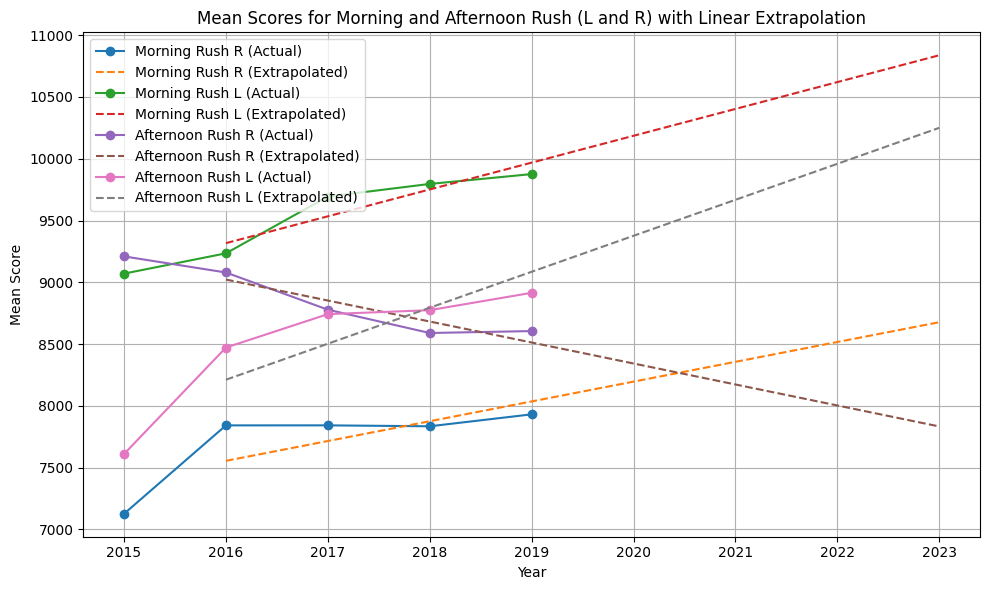

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('mean_scores_road4_HR_R_2015_2019.xlsx')

# Pivot the data for easier plotting
pivot_df = df.pivot_table(index='Year', columns=['Rush', 'Direction'], values='Mean Score')

# Define the years you have data for
years = pivot_df.index.values

# Define the years you want to extrapolate to (e.g., 2020, 2021, 2022)
years_extended = np.arange(2016, 2024)  # 2015 to 2022

# Create a function for linear extrapolation
def linear_extrapolate(years, values):
    # Fit a linear trendline to the data
    slope, intercept = np.polyfit(years, values, 1)
    # Predict values for the extended years
    extrapolated_values = slope * years_extended + intercept
    return extrapolated_values

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the original data and the extrapolated lines
for rush, direction in [('Morning', 'R'), ('Morning', 'L'), ('Afternoon', 'R'), ('Afternoon', 'L')]:
    # Extract the actual mean score for the current rush and direction
    actual_values = pivot_df[(rush, direction)].values
    
    # Perform the linear extrapolation
    extrapolated_values = linear_extrapolate(years, actual_values)
    
    # Plot the actual data
    plt.plot(years, actual_values, label=f'{rush} Rush {direction} (Actual)', marker='o')
    
    # Plot the extrapolated data
    plt.plot(years_extended, extrapolated_values, label=f'{rush} Rush {direction} (Extrapolated)', linestyle='--')

# Add titles and labels
plt.title('Mean Scores for Morning and Afternoon Rush (L and R) with Linear Extrapolation')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
df = pd.read_excel('mean_scores_road4_HR_R_2015_2019.xlsx')

# Pivot the data for easier plotting
pivot_df = df.pivot_table(index='Year', columns=['Rush', 'Direction'], values='Mean Score')

# Define the years you have data for
years = pivot_df.index.values

# Define the years you want to extrapolate to (e.g., 2020, 2021, 2022)
years_extended = np.arange(2015, 2024)  # 2015 to 2022

# Create a function for linear extrapolation
def linear_extrapolate(years, values):
    # Fit a linear trendline to the data
    slope, intercept = np.polyfit(years, values, 1)
    # Predict values for the extended years
    extrapolated_values = slope * years_extended + intercept
    return extrapolated_values

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the original data and the extrapolated lines
for rush, direction in [('Morning', 'R'), ('Morning', 'L'), ('Afternoon', 'R'), ('Afternoon', 'L')]:
    # Extract the actual mean score for the current rush and direction
    actual_values = pivot_df[(rush, direction)].values
    
    # Perform the linear extrapolation
    extrapolated_values = linear_extrapolate(years, actual_values)
    
    # Plot the actual data
    plt.plot(years, actual_values, label=f'{rush} Rush {direction} (Actual)', marker='o')
    
    # Plot the extrapolated data
    plt.plot(years_extended, extrapolated_values, label=f'{rush} Rush {direction} (Extrapolated)', linestyle='--')

# Add titles and labels
plt.title('Mean Scores for Morning and Afternoon Rush (L and R) with Linear Extrapolation')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'mean_scores_road4_HR_R_2015_2019.xlsx'